**<font color='blue' size="+1">Proyecto: Detección de Fallas por Desbalance en Motores Eléctricos</font>**

Este proyecto tiene como objetivo desarrollar un modelo de aprendizaje automático para detectar problemas de desbalance en motores eléctricos mediante el análisis de datos de vibraciones. Se explorará cómo las características de las señales de vibración pueden indicar la presencia de desbalance en el motor, lo cual es crucial para mejorar la detección temprana de fallas en maquinaria industrial.
.


**<font color='blue' size="+1">Importación de Librerías y Preparación del Entorno</font>**

En esta sección, se importan las librerías necesarias y se prepara el entorno de trabajo para el análisis de datos y la construcción del modelo de aprendizaje automático.


In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


 **<font color="blue">Origen y Composición de los Datos</font>**

Los datos utilizados en este proyecto provienen del Simulador de Fallas de Maquinaria (MFS) de SpectraQuest, que simula diferentes estados de fallas en motores eléctricos. Cada archivo CSV contiene series de tiempo multivariadas adquiridas por sensores en el MFS.

Cantidad Total de Instancias: Aproximadamente 250,000 filas por archivo CSV.

Características por Instancia: Incluyen señal del tacómetro, acelerómetros de soporte y rodamiento, y micrófono.

Uso en este Proyecto: Se utilizó una muestra reducida de los datos debido a la gran cantidad disponible.

In [2]:


# Ruta de la carpeta de archivos normales
ruta_normales_nueva = r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\NORMAL\DATOS NORMAL UNIFICADO'

# Obtener la lista de archivos en la carpeta
archivos_normales = os.listdir(ruta_normales_nueva)

# Crear una lista para almacenar los DataFrames de cada archivo
dfs_normales = []

# Iterar sobre los archivos seleccionados y cargarlos en DataFrames
for archivo in archivos_normales:
    ruta_archivo = os.path.join(ruta_normales_nueva, archivo)
    df = pd.read_csv(ruta_archivo, header=None)  # Suponiendo que los archivos no tienen encabezado
    dfs_normales.append(df)

# Concatenar todos los DataFrames de datos normales en uno solo
df_normales = pd.concat(dfs_normales, ignore_index=True)

# Mostrar las primeras filas del DataFrame para verificar
print("Datos de archivos normales:")
print(df_normales.head())

Datos de archivos normales:
        0         1         2         3        4         5        6         7
0  4.5595  0.175200  0.287210 -0.017751 -0.41565  0.032459 -0.11218 -0.128140
1  4.6038 -0.051295 -0.194050 -0.060071 -0.41809  0.036547 -0.11043  0.118310
2  4.5703 -0.969080  0.038033 -0.028329 -0.43081  0.041924 -0.14331 -0.071527
3  4.5870  0.891270  0.072973  0.007453 -0.40017  0.041090 -0.11984  0.043445
4  4.5887 -1.716000 -0.329290 -0.033063 -0.50281  0.040474 -0.25270  0.023901


**<font color='blue' size="+1">Carga de Archivos de Datos</font>**

En esta sección, se cargan los datos de los archivos CSV que representan mediciones de motores en funcionamiento normal y con diferentes niveles de desbalance.

In [3]:


# Ruta de las carpetas que contienen los archivos de desbalances
ruta_desbalances_nueva = r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\DATOS DESBALANCE UNIFICADO'

# Obtener la lista de archivos en la carpeta
archivos_desbalances = os.listdir(ruta_desbalances_nueva)

# Crear una lista para almacenar los DataFrames de cada archivo
dfs_desbalances = []

# Iterar sobre los archivos seleccionados y cargarlos en DataFrames
for archivo in archivos_desbalances:
    ruta_archivo = os.path.join(ruta_desbalances_nueva, archivo)
    df = pd.read_csv(ruta_archivo, header=None)  # Suponiendo que los archivos no tienen encabezado
    dfs_desbalances.append(df)

# Concatenar todos los DataFrames de desbalances en uno solo
df_desbalances = pd.concat(dfs_desbalances, ignore_index=True)

# Mostrar las primeras filas del DataFrame para verificar
print("\nDatos de archivos de desbalances:")
print(df_desbalances.head())



Datos de archivos de desbalances:
         0        1       2        3        4         5         6        7
0 -0.89277 -0.45756 -1.8349 -0.37923  0.12792  0.028454  0.226100 -0.22763
1 -0.84238 -0.77687 -2.8056 -0.11675  0.13105  0.031791  0.139390  0.40688
2 -0.85596 -0.52691 -2.1050  0.27217  0.13522  0.034146  0.188140 -0.24705
3 -0.85404 -0.49817 -2.8183  0.41154  0.13355  0.035244  0.133310  0.33591
4 -0.84681 -1.07490 -2.5765  0.45869  0.13270  0.033171  0.097112 -0.10638




**<font color='blue' size='+1'>Exploración de Datos</font>**

En este punto, realizaremos gráficos que nos permitan visualizar las relaciones y distribuciones de nuestras variables. El objetivo es identificar patrones ocultos, detectar posibles discrepancias o valores atípicos que puedan afectar la calidad de los datos y obtener insights iniciales que nos orienten hacia análisis más profundos y la construcción de modelos predictivos precisos.
débil o inexistente.



**<font color= "blue">Matriz de Correlación</font>**

La matriz de correlación es una herramienta fundamental en el análisis exploratorio de datos. Este tipo de gráfico, un mapa de calor, nos permite visualizar las relaciones de correlación entre pares de variables en un conjunto de datos.

Propósito del Gráfico

Tipo de Gráfico: Mapa de calor.

Razón de Selección: Se utiliza para identificar patrones de correlación entre las diferentes variables del dataset. La intensidad y dirección del color indican el grado y la naturaleza de la correlación: positiva (más cercana a 1 en color cálido) o negativa (más cercana a -1 en color frío).

Interpretación Preliminar: Las correlaciones cercanas a 1 indican una relación positiva fuerte, mientras que las cercanas a -1 indican una relación negativa fuerte. Valores cercanos a 0 sugieren una correlación débil o inexistente.

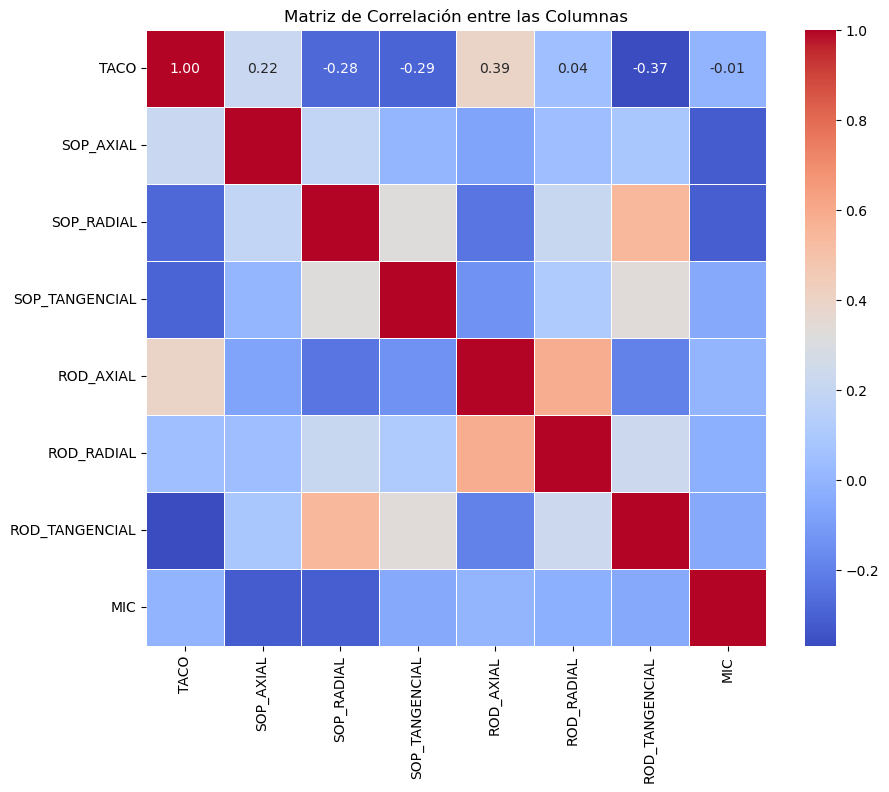

In [4]:


# Asignar nombres a las columnas según la especificación dada
df.columns = ['TACO', 'SOP_AXIAL', 'SOP_RADIAL', 'SOP_TANGENCIAL', 'ROD_AXIAL', 'ROD_RADIAL', 'ROD_TANGENCIAL', 'MIC']

# Calcular la matriz de correlación
matriz_correlacion = df.corr()

# Visualización de la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre las Columnas')
plt.show()


**<font color = "blue">Observaciones sobre la Matriz de Correlación</font>**

La matriz de correlación revela que la relación más fuerte entre las variables es de 0.39, mientras que la correlación más débil es de -0.1 (excluyendo las variables que se comparan con ellas mismas). Esto sugiere que algunas variables están moderadamente relacionadas entre sí, pero no todas presentan una correlación alta. Además, se observa que la variable de "MIC" (micrófono) muestra una correlación baja con todas las demás variables en el conjunto de datos.
s.

**<font color = "blue">Verificación del Balance de los Datos</font>**

A raíz de la observación anterior sobre la baja correlación de la variable "MIC" con las demás variables, es crucial verificar si los datos están balanceados. Para esto, creamos la siguiente visualización:

In [6]:
# Contar el número de muestras en cada DataFrame

# DataFrame para archivos normales
print("Archivos Normales:")
for i, df_normal in enumerate(dfs_normales, 1):
    print(f"DataFrame {i}: {df_normal.shape[0]} filas")

# DataFrame para archivos de desbalance
print("\nArchivos de Desbalance:")
for i, df_desbalance in enumerate(dfs_desbalances, 1):
    print(f"DataFrame {i}: {df_desbalance.shape[0]} filas")


Archivos Normales:
DataFrame 1: 250000 filas
DataFrame 2: 250000 filas
DataFrame 3: 250000 filas
DataFrame 4: 250000 filas
DataFrame 5: 250000 filas
DataFrame 6: 250000 filas
DataFrame 7: 250000 filas

Archivos de Desbalance:
DataFrame 1: 250000 filas
DataFrame 2: 250000 filas
DataFrame 3: 250000 filas
DataFrame 4: 250000 filas
DataFrame 5: 250000 filas
DataFrame 6: 250000 filas
DataFrame 7: 250000 filas


**<font color = "blue">Conclusión:</font>** Esta visualización nos permite verificar que tanto los conjuntos de datos normales como los desbalanceados contienen la misma cantidad de filas (250,000 filas en cada caso), asegurando que los datos están distribuidos de manera equitativa y adecuada para un análisis preciso.

**<font color = "blue">Exploración de Datos con Histogramas</font>**

En esta etapa, utilizamos histogramas para explorar la distribución de las características tanto en los archivos normales como en los archivos de desbalance. Los histogramas nos proporcionan una representación visual de la frecuencia de valores en cada característica, lo cual es útil para:

**Identificar la distribución de los datos:** Nos permite visualizar la forma y dispersión de los datos en cada característica.

**Detectar posibles sesgos o patrones:** Podemos observar si hay características con distribuciones inusuales que podrían indicar problemas o particularidades en los datos.

**Comparar distribuciones:** Al graficar los histogramas de los archivos normales y desbalanceados, podemos comparar cómo se distribuyen las características en ambos conjuntos de datos.
e datos.

<Figure size 1200x1000 with 0 Axes>

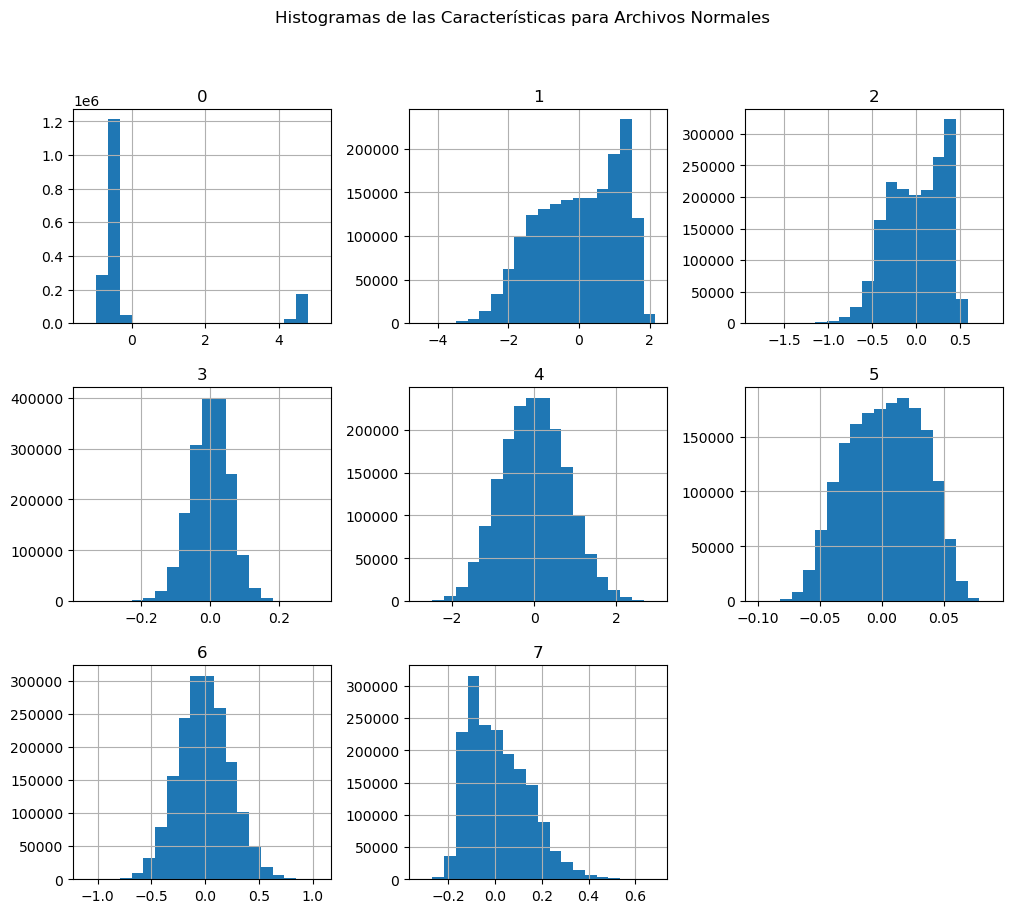

<Figure size 1200x1000 with 0 Axes>

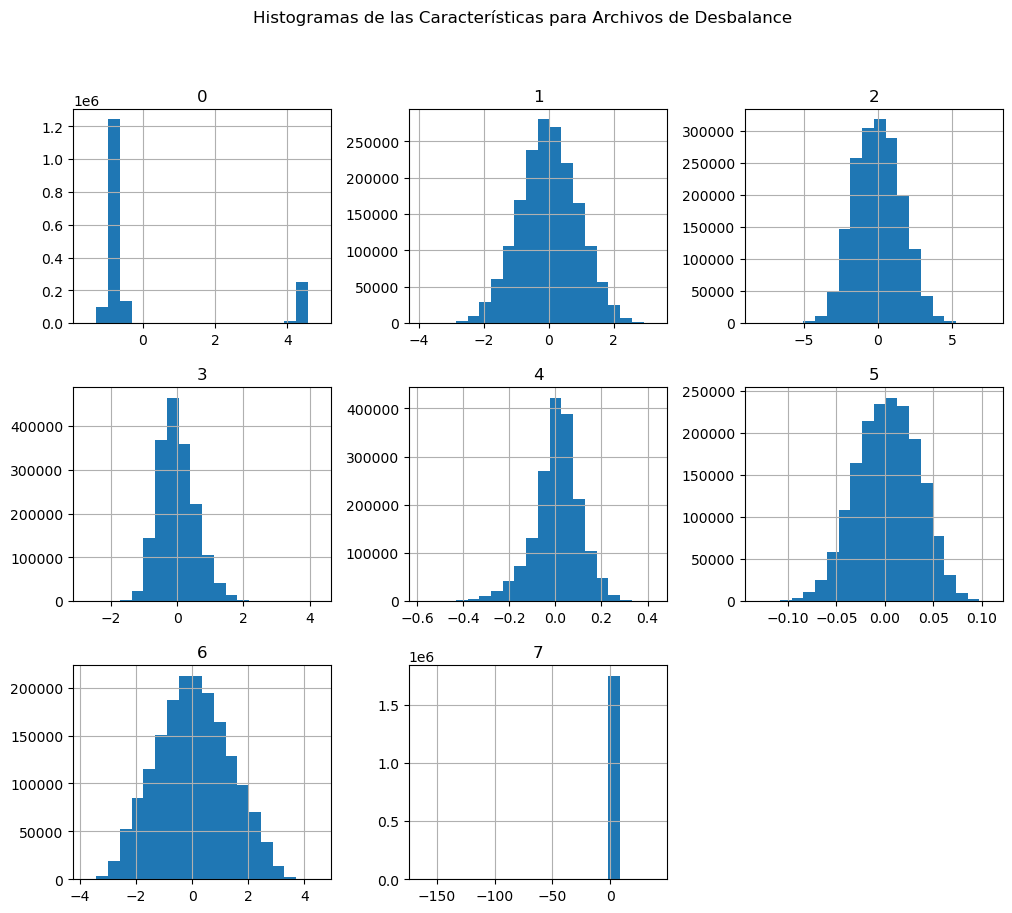

In [7]:
# Histogramas para archivos normales
plt.figure(figsize=(12, 10))
df_normales.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogramas de las Características para Archivos Normales')
plt.show()

# Histogramas para archivos de desbalance
plt.figure(figsize=(12, 10))
df_desbalances.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogramas de las Características para Archivos de Desbalance')
plt.show()


**<font color = "blue">Conclusión:</font>**

A partir de estos histogramas, podemos observar la distribución de las características en ambos conjuntos de datos. Esto nos proporciona una comprensión inicial sobre cómo están distribuidos los valores y nos prepara para análisis más detallados sobre la naturaleza de los datos. Se destaca una particularidad observada en el histograma de la columna 7, relacionada con el micrófono (MIC), donde se observa una escala en el eje y que alcanza hasta 1.5 millones, a diferencia de los otros gráficos que muestran un máximo de hasta 400 mil. Esto sugiere la presencia de posibles datos anómalos o valores atípicos que podrían requerir una revisión adicional para determinar su impacto en el análisis.

**<font color = "blue">Gráfico Boxplot:</font>**

Este gráfico de tipo boxplot nos permite visualizar la distribución y la variabilidad de las características en ambos conjuntos de datos: los archivos normales y los archivos de desbalance. Utilizamos este tipo de visualización porque nos ayuda a identificar de manera clara y comparativa la dispersión de los datos, incluyendo la presencia de valores atípicos y la distribución de los cuartiles en cada característica.

<Figure size 1200x800 with 0 Axes>

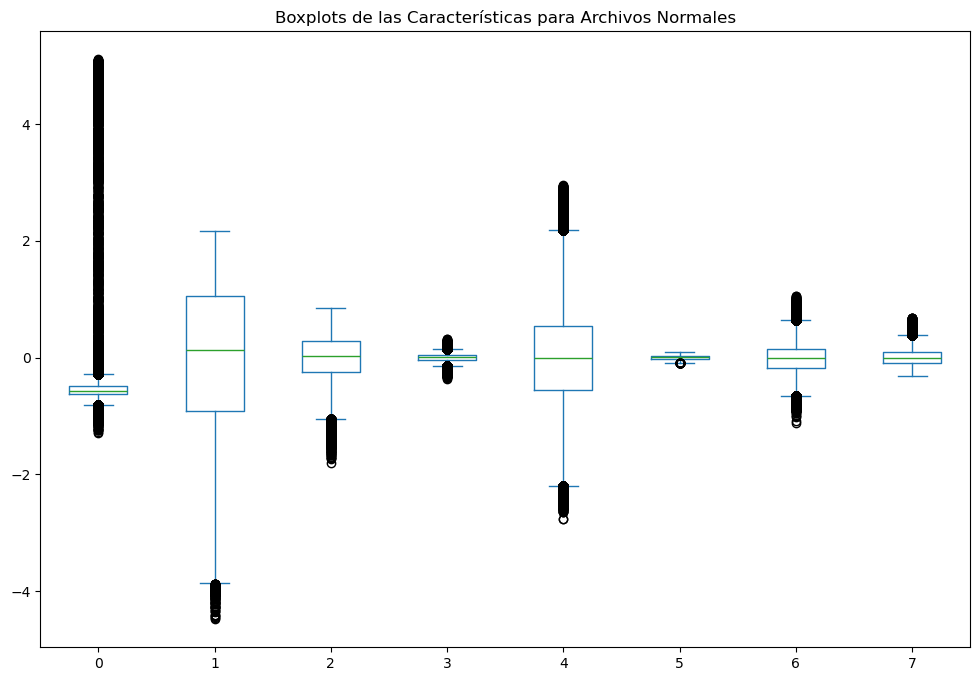

<Figure size 1200x800 with 0 Axes>

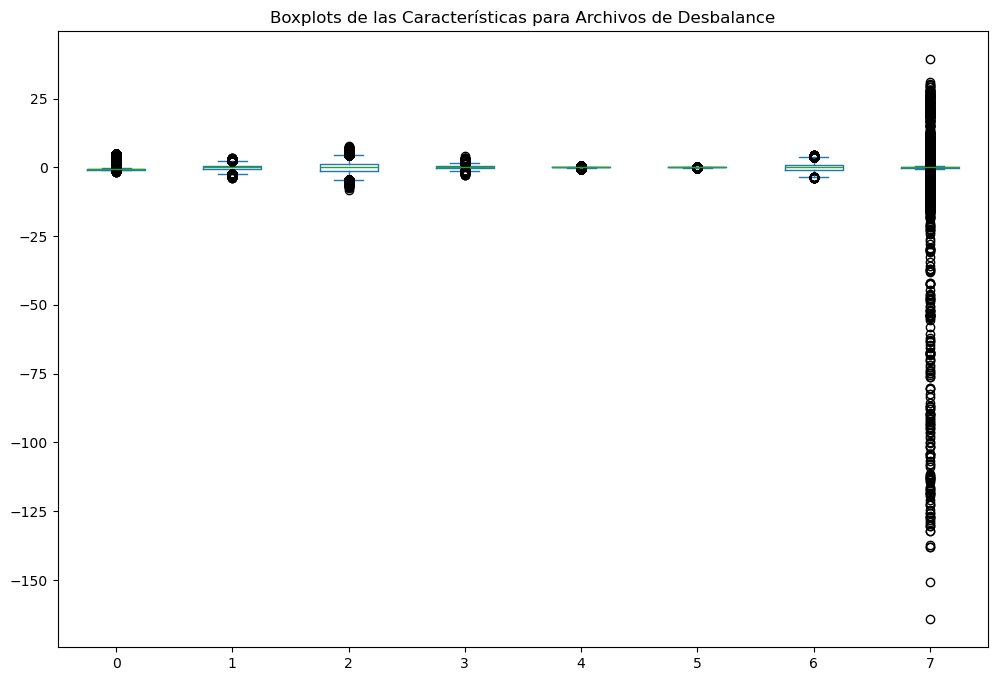

In [8]:
# Boxplots para archivos normales
plt.figure(figsize=(12, 8))
df_normales.plot(kind='box', figsize=(12, 8))
plt.title('Boxplots de las Características para Archivos Normales')
plt.show()

# Boxplots para archivos de desbalance
plt.figure(figsize=(12, 8))
df_desbalances.plot(kind='box', figsize=(12, 8))
plt.title('Boxplots de las Características para Archivos de Desbalance')
plt.show()


**<font color = "blue">Conclusión:</font>**

Los boxplots ofrecen una clara visualización de cómo están distribuidas las características en nuestros conjuntos de datos. En los archivos normales, la mayoría de las características muestran un rango intercuartílico (IQR) típico de aproximadamente -4 a 4, indicando una dispersión moderada alrededor de la mediana. En contraste, los archivos de desbalance revelan que la columna MIC tiene un rango mucho más amplio, desde -150 hasta 25, sugiriendo la presencia de valores atípicos significativos o una variabilidad extrema.

Estos hallazgos subrayan la necesidad de investigar más a fondo la naturaleza y el impacto de los valores atípicos en nuestro análisis de datos. Dado el enfoque del proyecto en el análisis de vibraciones, excluyendo el análisis de ultrasonido, se decide no utilizar la columna MIC debido a estas anomalías. Esta decisión asegura mantener la precisión y fiabilidad de los modelos predictivos que desarrollaremos.

**<font color = "blue">Preparación para Eliminar la Columna</font>**

A continuación, procederemos a eliminar la columna relacionada al micrófono (MIC) debido a las anomalías observadas en los datos.

In [9]:
# Eliminar la columna en la posición 7 (índice 7) de df_normales
if len(df_normales.columns) > 7:  # Verificar que hay al menos 8 columnas
    df_normales.drop(df_normales.columns[7], axis=1, inplace=True)
else:
    print("No se puede eliminar la séptima columna porque no hay suficientes columnas en df_normales.")

# Eliminar la columna en la posición 7 (índice 7) de df_desbalances
if len(df_desbalances.columns) > 7:  # Verificar que hay al menos 8 columnas
    df_desbalances.drop(df_desbalances.columns[7], axis=1, inplace=True)
else:
    print("No se puede eliminar la séptima columna porque no hay suficientes columnas en df_desbalances.")


**<font color = "blue">Verificación de Columnas Actualizadas</font>**

A continuación, imprimiremos las columnas actualizadas de los conjuntos de datos df_normales y df_desbalances después de eliminar la columna 'MIC':

In [10]:
# Imprimir las columnas actuales de df_normales y df_desbalances
print("Columnas de df_normales después de eliminar 'MIC':")
print(df_normales.columns)

print("\nColumnas de df_desbalances después de eliminar 'MIC':")
print(df_desbalances.columns)


Columnas de df_normales después de eliminar 'MIC':
Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

Columnas de df_desbalances después de eliminar 'MIC':
Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


**<font color = "blue">Histogramas Comparativos después de Eliminar 'MIC'</font>**

Para analizar visualmente las diferencias entre los conjuntos de datos df_normales y df_desbalances después de eliminar la columna 'MIC', hemos creado histogramas combinados que permiten una comparación directa:

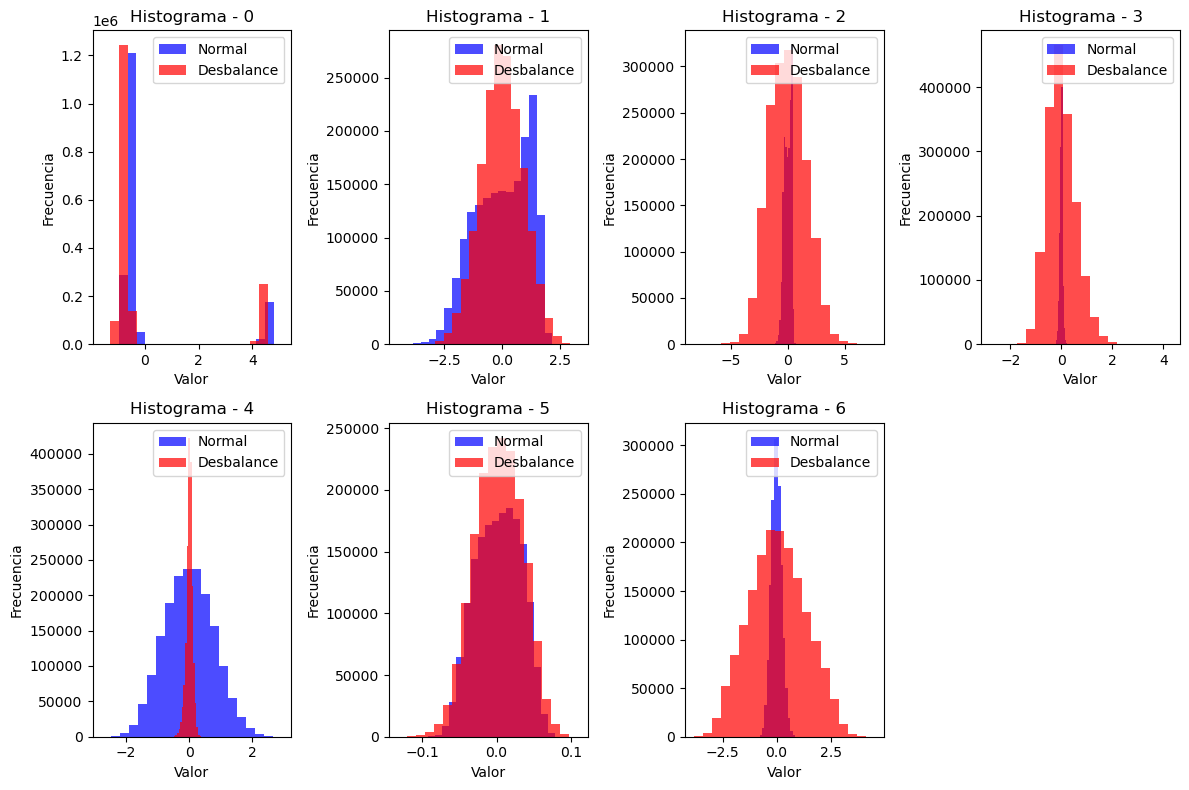

In [11]:


# Definir el número de columnas y filas para los subplots
n_cols = 4  # Ajusta según la cantidad de columnas deseadas
n_rows = (df_normales.shape[1] // n_cols) + 1

# Comparación de histogramas entre Normal y Desbalance
plt.figure(figsize=(12, 8))

# Histogramas para todas las columnas
for i, col in enumerate(df_normales.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df_normales[col], bins=20, alpha=0.7, color='blue', label='Normal')
    plt.hist(df_desbalances[col], bins=20, alpha=0.7, color='red', label='Desbalance')
    plt.title(f'Histograma - {col}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.legend()

plt.tight_layout()
plt.show()


**<font color = "blue">Conclusión:</font>**

Estos histogramas combinados muestran la distribución de cada característica en los conjuntos de datos df_normales (en azul) y df_desbalances (en rojo). Observamos claramente las diferencias entre ambos conjuntos después de eliminar la columna 'MIC'. Esto es crucial para garantizar que nuestro modelo pueda distinguir efectivamente entre resultados normales y desbalanceados durante la predicción.

**<font color = "blue">Verificación de Integridad de los Datos</font>**

Vamos a verificar que los datos estén completos y no presenten valores faltantes antes de continuar con el análisis y modelado.

In [13]:
# Verificar valores faltantes en df_normales
missing_normales = df_normales.isnull().sum()
print("Valores faltantes en df_normales:")
print(missing_normales)

# Verificar valores faltantes en df_desbalances
missing_desbalances = df_desbalances.isnull().sum()
print("\nValores faltantes en df_desbalances:")
print(missing_desbalances)


Valores faltantes en df_normales:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

Valores faltantes en df_desbalances:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


**<font color = "blue">Conclusiones:</font>**

Después de verificar los valores faltantes en los conjuntos de datos df_normales y df_desbalances, confirmamos que no se encontraron valores faltantes en ninguna de las columnas en ambos conjuntos. Esto asegura que los datos están completos y listos para proceder con el análisis exploratorio y la construcción de modelos predictivos.

**<font color = "blue">Verificación de Distribución de Datos Después de Eliminar la Columna 'MIC'</font>**

Vamos a utilizar boxplots para visualizar cómo quedaron distribuidos los datos después de eliminar la columna 'MIC'. Esto nos permitirá identificar valores atípicos y comparar la distribución entre los conjuntos de datos normales y desbalanceados.

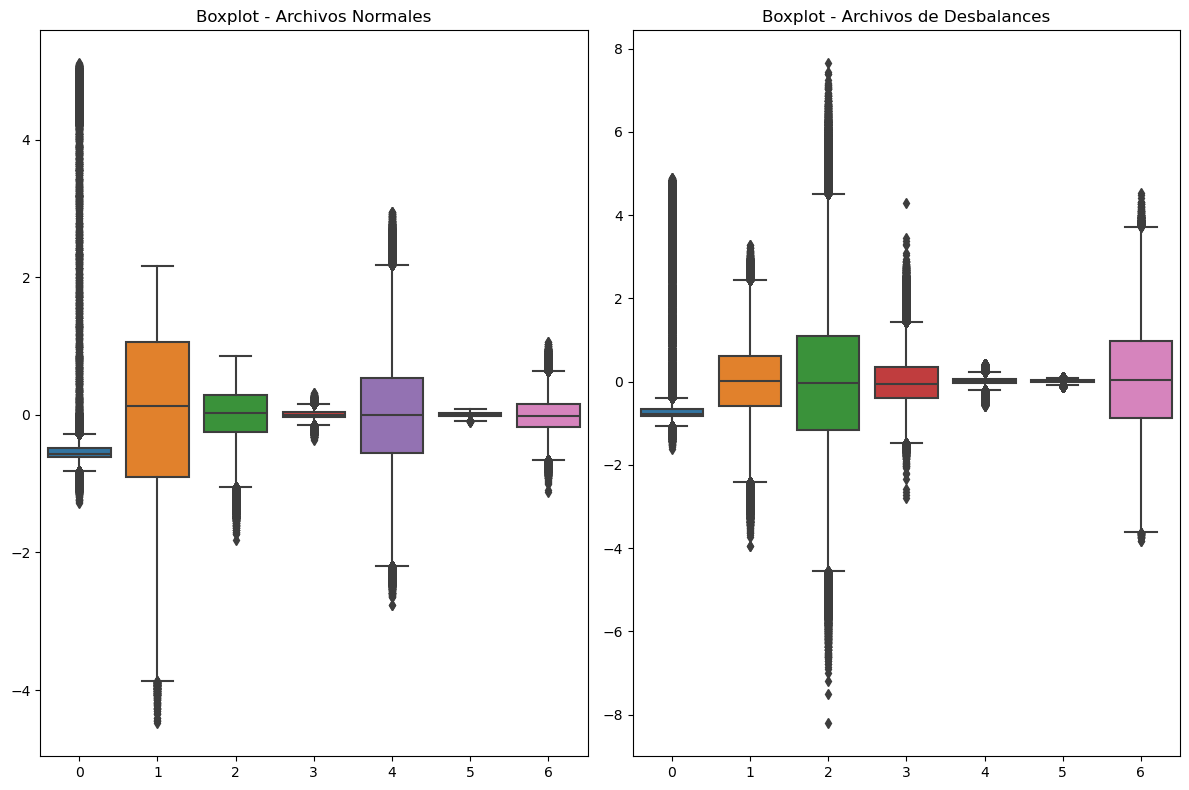

In [14]:
# Usando boxplots para identificar valores atípicos en ambos DataFrames
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_normales)
plt.title("Boxplot - Archivos Normales")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_desbalances)
plt.title("Boxplot - Archivos de Desbalances")

plt.tight_layout()
plt.show()


**<font color = "blue">Conclusiones:</font>**

Después de eliminar la columna 'MIC', observamos mediante los boxplots que los datos en ambos conjuntos (df_normales y df_desbalances) ahora muestran una distribución más uniforme y claramente definida. Los valores atípicos son menos prominentes, lo que facilita la identificación de patrones y la clasificación adecuada por parte de nuestros modelos predictivos. Esta normalización en la distribución de datos entre los rangos intercuartílicos aumenta la capacidad del modelo para discernir entre resultados normales y desbalanceados de manera más efectiva.

**<font color = "blue">Etiquetación de Datos y Verificación</font>**

Vamos a proceder etiquetando los datos como 0 para los archivos normales y 1 para los archivos de desbalance. Esta etiquetación es crucial porque nuestro modelo será diseñado para una clasificación binaria, donde necesitamos predecir si los datos corresponden a una condición de desbalance o no.

**<font color = "blue" size="+1">Visualización para Verificar Distribución de Etiquetas</font>**

Después de etiquetar los datos, visualizaremos la distribución de las etiquetas para asegurarnos de que los datos estén correctamente etiquetados como 0 para normales y 1 para desbalanceados.

In [15]:
# Etiquetar datos normales
df_normales['Etiqueta'] = 0  # Etiqueta 0 para datos normales

# Etiquetar datos de desbalance
df_desbalances['Etiqueta'] = 1  # Etiqueta 1 para datos de desbalance

# Verificar que se hayan añadido las etiquetas correctamente
print("Datos normales con etiquetas:")
print(df_normales.head())

print("\nDatos de desbalance con etiquetas:")
print(df_desbalances.head())


Datos normales con etiquetas:
        0         1         2         3        4         5        6  Etiqueta
0  4.5595  0.175200  0.287210 -0.017751 -0.41565  0.032459 -0.11218         0
1  4.6038 -0.051295 -0.194050 -0.060071 -0.41809  0.036547 -0.11043         0
2  4.5703 -0.969080  0.038033 -0.028329 -0.43081  0.041924 -0.14331         0
3  4.5870  0.891270  0.072973  0.007453 -0.40017  0.041090 -0.11984         0
4  4.5887 -1.716000 -0.329290 -0.033063 -0.50281  0.040474 -0.25270         0

Datos de desbalance con etiquetas:
         0        1       2        3        4         5         6  Etiqueta
0 -0.89277 -0.45756 -1.8349 -0.37923  0.12792  0.028454  0.226100         1
1 -0.84238 -0.77687 -2.8056 -0.11675  0.13105  0.031791  0.139390         1
2 -0.85596 -0.52691 -2.1050  0.27217  0.13522  0.034146  0.188140         1
3 -0.85404 -0.49817 -2.8183  0.41154  0.13355  0.035244  0.133310         1
4 -0.84681 -1.07490 -2.5765  0.45869  0.13270  0.033171  0.097112         1


**<font color = "blue">Separación de los datos en Entrenamiento y Prueba</font>**

Procederemos a realizar la separación de nuestros datos en conjuntos de entrenamiento y prueba. Esta acción es fundamental para evaluar la capacidad predictiva de nuestro modelo de manera objetiva y para asegurar que nuestro modelo pueda generalizar bien a nuevos datos.

In [19]:


# Dividir datos normales en entrenamiento y prueba

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    df_normales.drop(columns=['Etiqueta']),  # características de los datos normales
    df_normales['Etiqueta'],  # etiquetas de los datos normales
    test_size=0.25,  # 25% para prueba, 75% para entrenamiento
    random_state=42  # semilla aleatoria para reproducibilidad
)

# Dividir datos de desbalance en entrenamiento y prueba
X_train_desbalance, X_test_desbalance, y_train_desbalance, y_test_desbalance = train_test_split(
    df_desbalances.drop(columns=['Etiqueta']),  # características de los datos desbalanceados
    df_desbalances['Etiqueta'],  # etiquetas de los datos desbalanceados
    test_size=0.25,  # 25% para prueba, 75% para entrenamiento
    random_state=42  # semilla aleatoria para reproducibilidad
)



In [20]:
print(f'Datos de entrenamiento (normales): {X_train_norm.shape}')
print(f'Datos de prueba (normales): {X_test_norm.shape}')
print(f'Datos de entrenamiento (desbalance): {X_train_desbalance.shape}')
print(f'Datos de prueba (desbalance): {X_test_desbalance.shape}')


Datos de entrenamiento (normales): (1312500, 7)
Datos de prueba (normales): (437500, 7)
Datos de entrenamiento (desbalance): (1312500, 7)
Datos de prueba (desbalance): (437500, 7)


In [21]:
print("Distribución de clases en y_test_norm:", np.unique(y_test_norm, return_counts=True))
print("Distribución de clases en y_test_desbalance:", np.unique(y_test_desbalance, return_counts=True))


Distribución de clases en y_test_norm: (array([0], dtype=int64), array([437500], dtype=int64))
Distribución de clases en y_test_desbalance: (array([1], dtype=int64), array([437500], dtype=int64))


**<font color = "blue">Selección del Tamaño de los Conjuntos de Entrenamiento y Prueba</font>**

Se seleccionó dividir los datos en un 25% para prueba y un 75% para entrenamiento. Este porcentaje se eligió buscando un equilibrio comúnmente utilizado entre la cantidad de datos utilizados para entrenamiento y la cantidad reservada para la evaluación del modelo. Ahora procederemos a entrenar nuestro modelo.

**<font color = "blue" size="+1">Entrenamiento y Evaluación de Modelos para Clasificación Binaria</font>**

Vamos a entrenar y evaluar nuestro modelo utilizando tres algoritmos principales: Random Forest, Regresión Logística y Máquinas de Vectores de Soporte (SVM). La elección de estos algoritmos está relacionada con el hecho de que todos son adecuados para problemas de clasificación binaria. Esto significa que son capaces de predecir entre dos clases distintas, lo cual es fundamental para este proyecto donde el objetivo es determinar la presencia de desbalance. Cada uno de estos algoritmos puede manejar eficazmente esta tarea, ofreciendo diferentes fortalezas en términos de robustez, simplicidad, capacidad para manejar datos complejos y eficiencia computacional.

**<font color = "blue">Entrenamiento del Modelo: Random Forest</font>**

Vamos a utilizar el algoritmo Random Forest para entrenar nuestro modelo. Utilizaremos los datos de entrenamiento y evaluaremos su rendimiento utilizando los datos de prueba.

In [ ]:
# Inicializar el clasificador Random Forest para datos normales
rf_classifier_norm = RandomForestClassifier(random_state=42)

# Entrenamiento del modelo con datos normales
rf_classifier_norm.fit(X_train_norm, y_train_norm)

# Predicción en el conjunto de prueba (datos normales)
y_pred_rf_norm = rf_classifier_norm.predict(X_test_norm)

# Inicializar el clasificador Random Forest para datos de desbalance
rf_classifier_desbalance = RandomForestClassifier(random_state=42)

# Entrenamiento del modelo con datos de desbalance
rf_classifier_desbalance.fit(X_train_desbalance, y_train_desbalance)

# Predicción en el conjunto de prueba (datos de desbalance)
y_pred_rf_desbalance = rf_classifier_desbalance.predict(X_test_desbalance)


**<font color = "blue">Evaluación del Rendimiento del Modelo</font>**

Vamos a evaluar el rendimiento del modelo Random Forest en dos conjuntos de datos: los datos normales y los datos de desbalance. Utilizaremos métricas como la precisión, recall, F1-score y accuracy para entender qué tan bien está funcionando nuestro modelo en cada caso.

In [ ]:
# Evaluar rendimiento en datos normales
accuracy_rf_norm = accuracy_score(y_test_norm, y_pred_rf_norm)  # Calcular accuracy para datos normales
precision_rf_norm = precision_score(y_test_norm, y_pred_rf_norm)  # Calcular precisión para datos normales
recall_rf_norm = recall_score(y_test_norm, y_pred_rf_norm)  # Calcular recall para datos normales
f1_rf_norm = f1_score(y_test_norm, y_pred_rf_norm)  # Calcular F1-score para datos normales

# Imprimir métricas de rendimiento para datos normales
print("Métricas de rendimiento para Random Forest (datos normales):")
print(f"Accuracy: {accuracy_rf_norm:.4f}")  # Imprimir accuracy con cuatro decimales
print(f"Precisión: {precision_rf_norm:.4f}")  # Imprimir precisión con cuatro decimales
print(f"Recall: {recall_rf_norm:.4f}")  # Imprimir recall con cuatro decimales
print(f"F1-score: {f1_rf_norm:.4f}")  # Imprimir F1-score con cuatro decimales

# Evaluar rendimiento en datos de desbalance
accuracy_rf_desbalance = accuracy_score(y_test_desbalance, y_pred_rf_desbalance)  # Calcular accuracy para datos de desbalance
precision_rf_desbalance = precision_score(y_test_desbalance, y_pred_rf_desbalance)  # Calcular precisión para datos de desbalance
recall_rf_desbalance = recall_score(y_test_desbalance, y_pred_rf_desbalance)  # Calcular recall para datos de desbalance
f1_rf_desbalance = f1_score(y_test_desbalance, y_pred_rf_desbalance)  # Calcular F1-score para datos de desbalance

# Imprimir métricas de rendimiento para datos de desbalance
print("\nMétricas de rendimiento para Random Forest (datos de desbalance):")
print(f"Accuracy: {accuracy_rf_desbalance:.4f}")  # Imprimir accuracy con cuatro decimales
print(f"Precisión: {precision_rf_desbalance:.4f}")  # Imprimir precisión con cuatro decimal

**<font color = "blue">Entrenamiento del Modelo: Regresión Logística</font>**

Vamos a utilizar el algoritmo de Regresión Logística para entrenar nuestro modelo. Utilizaremos los datos de entrenamiento y evaluaremos su rendimiento utilizando los datos de prueba.ba.

In [ ]:
# Inicializar el clasificador de Regresión Logística
lr_classifier = LogisticRegression(random_state=42)

# Entrenamiento del modelo con datos normales
lr_classifier.fit(X_train_norm, y_train_norm)

# Predicción en el conjunto de prueba (datos normales)
y_pred_lr_norm = lr_classifier.predict(X_test_norm)

# Entrenamiento del modelo con datos de desbalance
lr_classifier.fit(X_train_desbalance, y_train_desbalance)

# Predicción en el conjunto de prueba (datos de desbalance)
y_pred_lr_desbalance = lr_classifier.predict(X_test_desbalance)

**<font color = "blue">Evaluación del Rendimiento del Modelo: Regresión Logística</font>**

Vamos a evaluar el rendimiento del modelo de Regresión Logística en dos conjuntos de datos: los datos normales y los datos de desbalance. Utilizaremos métricas como la precisión, recall, F1-score y accuracy para entender qué tan bien está funcionando nuestro modelo en cada caso.

In [ ]:
# Evaluar rendimiento en datos normales
accuracy_lr_norm = accuracy_score(y_test_norm, y_pred_lr_norm)  # Calcular accuracy para datos normales
precision_lr_norm = precision_score(y_test_norm, y_pred_lr_norm)  # Calcular precisión para datos normales
recall_lr_norm = recall_score(y_test_norm, y_pred_lr_norm)  # Calcular recall para datos normales
f1_lr_norm = f1_score(y_test_norm, y_pred_lr_norm)  # Calcular F1-score para datos normales

# Imprimir métricas de rendimiento para datos normales
print("Métricas de rendimiento para Regresión Logística (datos normales):")
print(f"Accuracy: {accuracy_lr_norm:.4f}")  # Imprimir accuracy con cuatro decimales
print(f"Precisión: {precision_lr_norm:.4f}")  # Imprimir precisión con cuatro decimales
print(f"Recall: {recall_lr_norm:.4f}")  # Imprimir recall con cuatro decimales
print(f"F1-score: {f1_lr_norm:.4f}")  # Imprimir F1-score con cuatro decimales

# Evaluar rendimiento en datos de desbalance
accuracy_lr_desbalance = accuracy_score(y_test_desbalance, y_pred_lr_desbalance)  # Calcular accuracy para datos de desbalance
precision_lr_desbalance = precision_score(y_test_desbalance, y_pred_lr_desbalance)  # Calcular precisión para datos de desbalance
recall_lr_desbalance = recall_score(y_test_desbalance, y_pred_lr_desbalance)  # Calcular recall para datos de desbalance
f1_lr_desbalance = f1_score(y_test_desbalance, y_pred_lr_desbalance)  # Calcular F1-score para datos de desbalance

# Imprimir métricas de rendimiento para datos de desbalance
print("\nMétricas de rendimiento para Regresión Logística (datos de desbalance):")
print(f"Accuracy: {accuracy_lr_desbalance:.4f}")  # Imprimir accuracy con cuatro decimales
print(f"Precisión: {precision_lr_desbalance:.4f}")  # Imprimir precisión con cuatro decimales
print(f"Recall: {recall_lr_desbalance:.4f}")  # Imprimir recall con cuatro decimales
print(f"F1-score: {f1_lr_desbalance:.4f}")  # Imprimir F1-score con cuatro decimales

**<font color = "blue">Entrenamiento del Modelo: Máquinas de Vectores de Soporte (SVM)</font>**

Vamos a utilizar el algoritmo de Máquinas de Vectores de Soporte (SVM) para entrenar nuestro modelo. Utilizaremos los datos de entrenamiento y evaluaremos su rendimiento utilizando los datos de prueba.

In [ ]:
# Inicializar el clasificador de SVM
svm_classifier = SVC(random_state=42)

# Entrenamiento del modelo con datos normales
svm_classifier.fit(X_train_norm, y_train_norm)

# Predicción en el conjunto de prueba (datos normales)
y_pred_svm_norm = svm_classifier.predict(X_test_norm)

# Entrenamiento del modelo con datos de desbalance
svm_classifier.fit(X_train_desbalance, y_train_desbalance)

# Predicción en el conjunto de prueba (datos de desbalance)
y_pred_svm_desbalance = svm_classifier.predict(X_test_desbalance)

**<font color = "blue">Evaluación del Rendimiento del Modelo: Máquinas de Vectores de Soporte (SVM)</font>**

Vamos a evaluar el rendimiento del modelo de Máquinas de Vectores de Soporte (SVM) en dos conjuntos de datos: los datos normales y los datos de desbalance. Utilizaremos métricas como la precisión, recall, F1-score y accuracy para entender qué tan bien está funcionando nuestro modelo en cada caso.

In [ ]:
# Evaluar rendimiento en datos normales
accuracy_svm_norm = accuracy_score(y_test_norm, y_pred_svm_norm)  # Calcular accuracy para datos normales
precision_svm_norm = precision_score(y_test_norm, y_pred_svm_norm)  # Calcular precisión para datos normales
recall_svm_norm = recall_score(y_test_norm, y_pred_svm_norm)  # Calcular recall para datos normales
f1_svm_norm = f1_score(y_test_norm, y_pred_svm_norm)  # Calcular F1-score para datos normales

# Imprimir métricas de rendimiento para datos normales
print("Métricas de rendimiento para SVM (datos normales):")
print(f"Accuracy: {accuracy_svm_norm:.4f}")  # Imprimir accuracy con cuatro decimales
print(f"Precisión: {precision_svm_norm:.4f}")  # Imprimir precisión con cuatro decimales
print(f"Recall: {recall_svm_norm:.4f}")  # Imprimir recall con cuatro decimales
print(f"F1-score: {f1_svm_norm:.4f}")  # Imprimir F1-score con cuatro decimales

# Evaluar rendimiento en datos de desbalance
accuracy_svm_desbalance = accuracy_score(y_test_desbalance, y_pred_svm_desbalance)  # Calcular accuracy para datos de desbalance
precision_svm_desbalance = precision_score(y_test_desbalance, y_pred_svm_desbalance)  # Calcular precisión para datos de desbalance
recall_svm_desbalance = recall_score(y_test_desbalance, y_pred_svm_desbalance)  # Calcular recall para datos de desbalance
f1_svm_desbalance = f1_score(y_test_desbalance, y_pred_svm_desbalance)  # Calcular F1-score para datos de desbalance

# Imprimir métricas de rendimiento para datos de desbalance
print("\nMétricas de rendimiento para SVM (datos de desbalance):")
print(f"Accuracy: {accuracy_svm_desbalance:.4f}")  # Imprimir accuracy con cuatro decimales
print(f"Precisión: {precision_svm_desbalance:.4f}")  # Imprimir precisión con cuatro decimales
print(f"Recall: {recall_svm_desbalance:.4f}")  # Imprimir recall con cuatro decimales
print(f"F1-score: {f1_svm_desbalance:.4f}")  # Imprimir F1-score con cuatro decimales